# Data Cleaning

Data cleaning is one of the key parts of the data science, as it can greatly impact the accuracy of the model. It is essential to provide a model with most accurate data as possible.


We use data cleaning for the following purposes:
- if data contains missing fields
- if data contains different presentation of the same value(in different lower cases etc, eg: Earth, earth, EARth...)

So as a first step, we will find out the percentage of missing value in the dataset.

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
# Charater Encoding
import chardet

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

Now ,let's look at the various methods:

In [2]:

# read in all our data
sf_permits = pd.read_csv("../input/building-permit-applications-data/Building_Permits.csv")

# getting the number of missing data
missing_values_count = sf_permits.isnull().sum()

# how many total missing values do we have?
total_cells= np.product(sf_permits.shape)
total_missing=missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


The next step would be , **why the data is missing:**

- Which, if either, are missing because they don't exist?
- Which, if either, are missing because they weren't recorded?

**The solution** for this is:

- If the amount of data missing in a particular column is high, we can ignore/remove those data columns.
- Once that is done, we can also fill in unavailble value with one that comes directly after it or 0.


In [3]:
# remove all the rows that contain a missing value
columns_with_na_dropped = sf_permits.dropna(axis=1)

# Filling the missing fields
sf_permits_with_na_imputed = sf_permits.fillna(method='bfill', axis=0).fillna(0)

## Scaling and Normalization

The next step is scaling and normalization of current data values.

In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:
- in scaling, you're changing the **range of your data**, while
- in normalization, you're changing **the shape of the distribution** of your data.


### Scaling
Scaling is done when you are you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1.


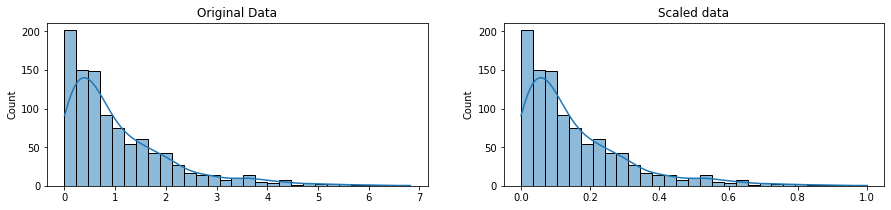

In [4]:


# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

### Normalization

The point of normalization is to change your observations so that they can be described as a normal distribution.
Here we are using Box-Cox Transformation.
> [Box-Cox Transforamtion](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation) transforms our data so that it closely resembles a normal distribution. 
> In many statistical techniques, we assume that the errors are normally distributed. <br> This assumption allows us to construct confidence intervals and conduct hypothesis tests.


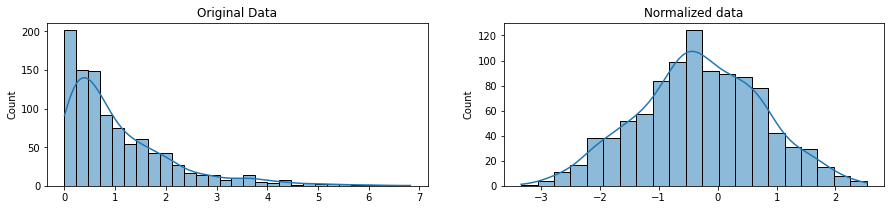

In [5]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

## Parsing Dates

In some data sets , dates may be stored as `object` data type rather than `datetime64` format. This can in turn produce anomalies in the final model. 

Solution:
- convert data columns to datetime
    ```
    landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")
    ```

- What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you can have pandas try to infer what the right date format should be. You can do that like so:
`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

## Character Encodings

### What are encodings?

**Character encodings** are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi"). There are many different encodings, and if you tried to read in text with a different encoding than the one it was originally written in, you ended up with scrambled text called "mojibake" (said like mo-gee-bah-kay)

**UTF-8** is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. It's when things aren't in UTF-8 that you run into trouble.

You can convert / encode it into UTF-8 with the following code: 
`after = sf_permits.encode("utf-8", errors="replace")`


There are some cases in which we may not know the actual encoding of the dataset. In that case, we can easily choose `chardet module` python module to automatically identify the right encoding.

In [6]:
# look at the first ten thousand bytes to guess the character encoding
with open("../input/data-cleaning-challenge-character-encodings/ks-projects-201801-utf8.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'utf-8', 'confidence': 0.7525, 'language': ''}


## Inconsistent Data Entry
Efficiently fix typos in your data. There is a high chance that the data can have a number of inconsistencies. 
This can be solved using few methods:
- Converting the data into lower case/upper case (to prevent any non regular case mis matches )
- Stripping down extra white spaces in the data
- Using `fuzzywuzzy` package to identify similar data entries using fuzzy matching technique.
> Fuzzy matching: The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. So "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" and one change away (rplace "i" with "o"). You won't always be able to rely on fuzzy matching 100%, but it will usually end up saving you at least a little time.

In [7]:
# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
# Reading Data
professors = pd.read_csv("../input/pakistan-intellectual-capital/pakistan_intellectual_capital.csv")
# convert to lower case
professors['Country'] = professors['Country'].str.lower()
# remove trailing white spaces
professors['Country'] = professors['Country'].str.strip()

# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

#Checking more similar data using fuzzy matching 
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

The methods to clean the data set depends upon the dataset itself. Yet these common methods can be utilised to produce a proper result.